In [1]:
import pandas as pd
data = pd.read_csv("creditcard.csv")

In [2]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [3]:
data = data.drop(['Time'], axis = 1)

In [4]:
from sklearn.preprocessing import StandardScaler
data['Norm_Amount'] = StandardScaler().fit_transform(
data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)
print(f"Few values of Amount column after applying StandardScaler:- \n{data['Norm_Amount'][0:4]}")

Few values of Amount column after applying StandardScaler:- 
0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: Norm_Amount, dtype: float64


In [5]:
from sklearn.model_selection import train_test_split
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364,)
(85443,)


In [6]:
import tensorflow as tf

# Adding layers in ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(input_dim = 29, units=29, activation='relu'))
ann.add(tf.keras.layers.Dense(units=29, activation='relu'))
ann.add(tf.keras.layers.Dense(units=29, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print("Model training start........")
ann.fit(X_train, y_train, batch_size = 15, epochs = 5)

Model training start........
Epoch 1/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0066 - accuracy: 0.9987
Epoch 2/5
13291/13291 [==============================] - 14s 1ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 14s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 14s 1ms/step - loss: 0.0028 - accuracy: 0.9994


2671/2671 [==============================] - 2s 694us/step


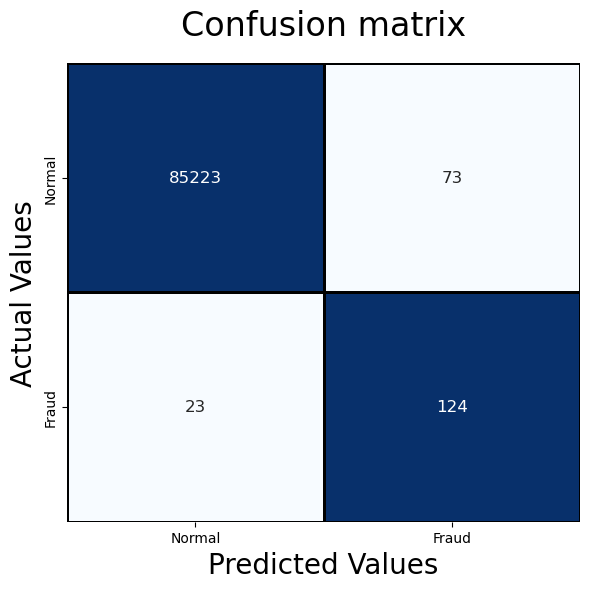

Classified 	124 out of 147 	fraud cases correctly
Misclassified 	73 out of 85296 normal cases
AROC score :- 
 0.9213407858922973


In [7]:
# predict result using test dataset
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.1)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

2671/2671 [==============================] - 2s 726us/step


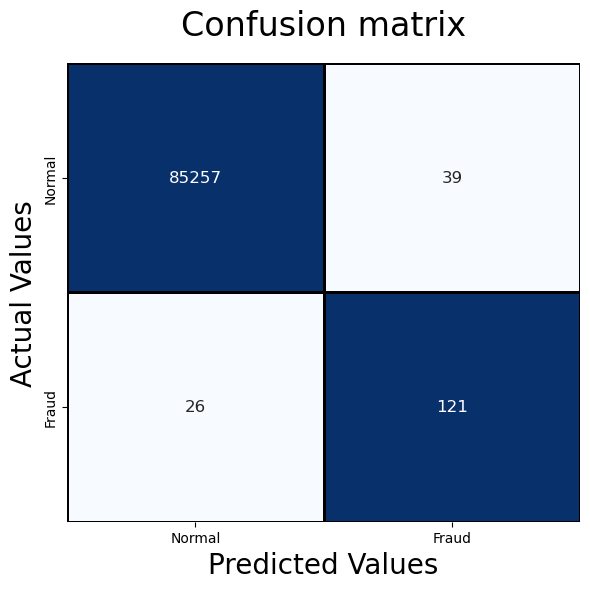

Classified 	121 out of 147 	fraud cases correctly
Misclassified 	39 out of 85296 normal cases
AROC score :- 
 0.9113360102059958


In [8]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.2)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

2671/2671 [==============================] - 2s 669us/step


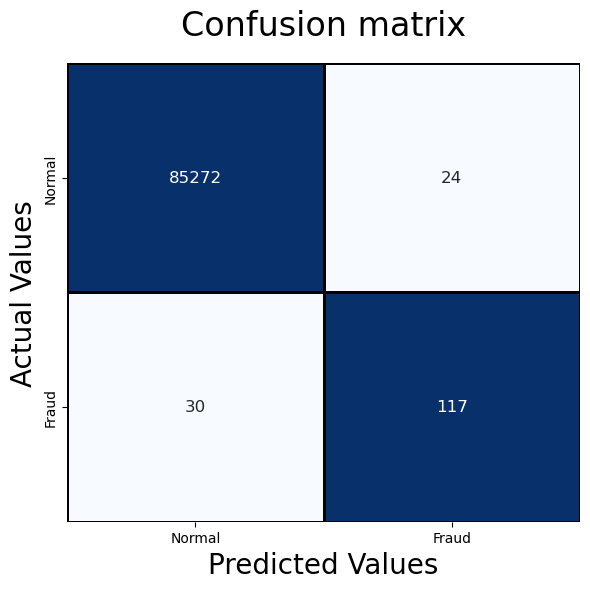

Classified 	117 out of 147 	fraud cases correctly
Misclassified 	24 out of 85296 normal cases
AROC score :- 
 0.8978184971231036


In [9]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.3)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

2671/2671 [==============================] - 2s 697us/step


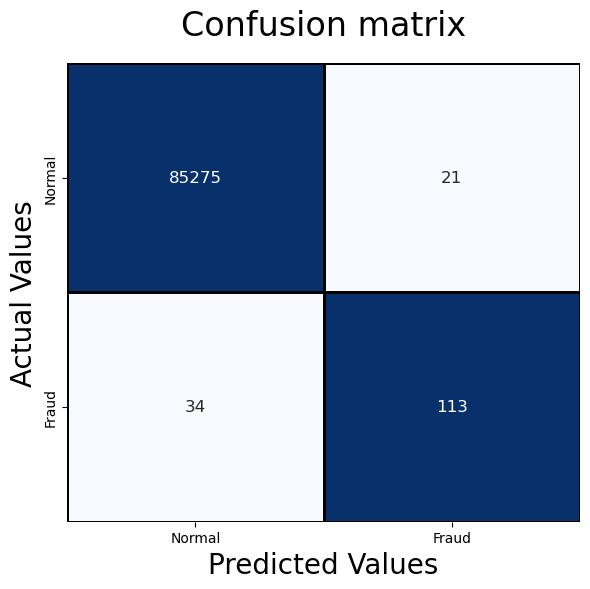

Classified 	113 out of 147 	fraud cases correctly
Misclassified 	21 out of 85296 normal cases
AROC score :- 
 0.8842306407650286


In [10]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.4)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

2671/2671 [==============================] - 2s 669us/step


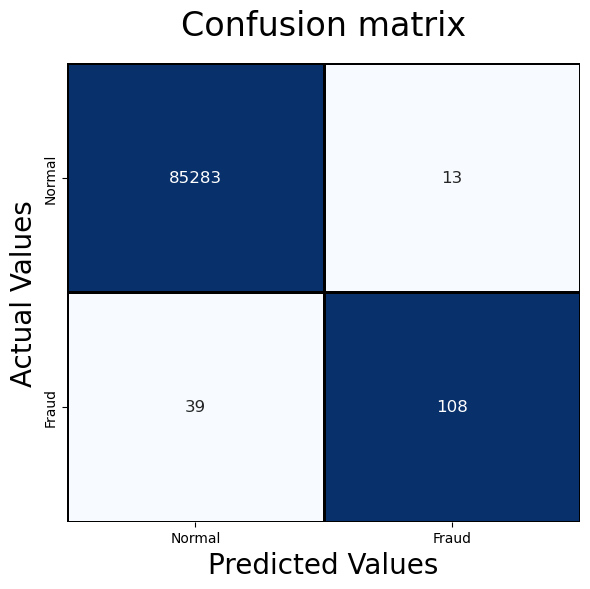

Classified 	108 out of 147 	fraud cases correctly
Misclassified 	13 out of 85296 normal cases
AROC score :- 
 0.8672707335607287


In [11]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.5)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

2671/2671 [==============================] - 2s 680us/step


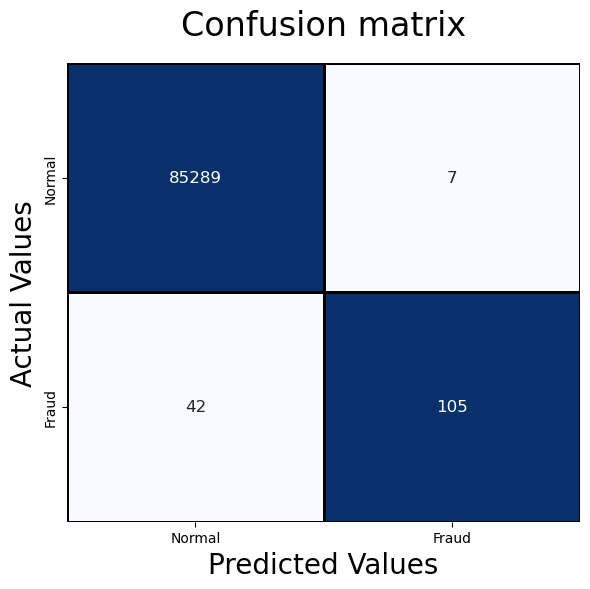

Classified 	105 out of 147 	fraud cases correctly
Misclassified 	7 out of 85296 normal cases
AROC score :- 
 0.8571018235656671


In [12]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.6)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

2671/2671 [==============================] - 2s 654us/step


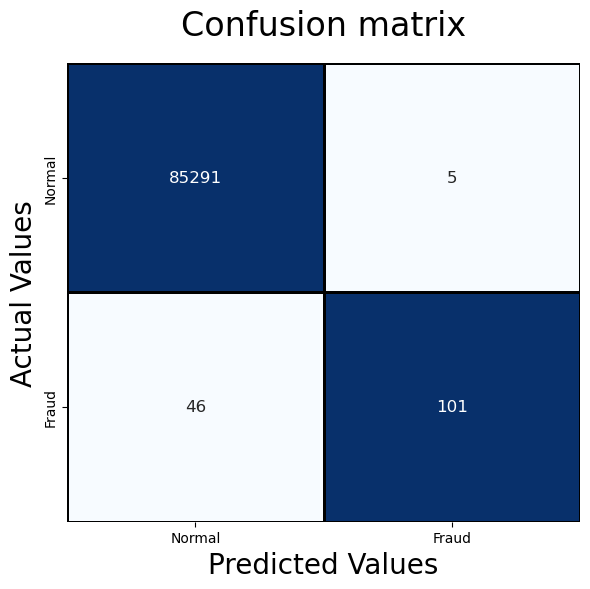

Classified 	101 out of 147 	fraud cases correctly
Misclassified 	5 out of 85296 normal cases
AROC score :- 
 0.8435081052679936


In [13]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.7)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

2671/2671 [==============================] - 2s 685us/step


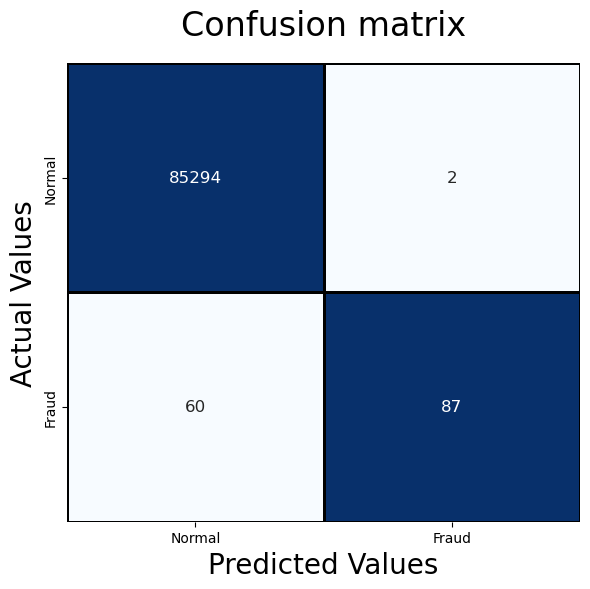

Classified 	87 out of 147 	fraud cases correctly
Misclassified 	2 out of 85296 normal cases
AROC score :- 
 0.7959066434677416


In [14]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.8)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

2671/2671 [==============================] - 2s 648us/step


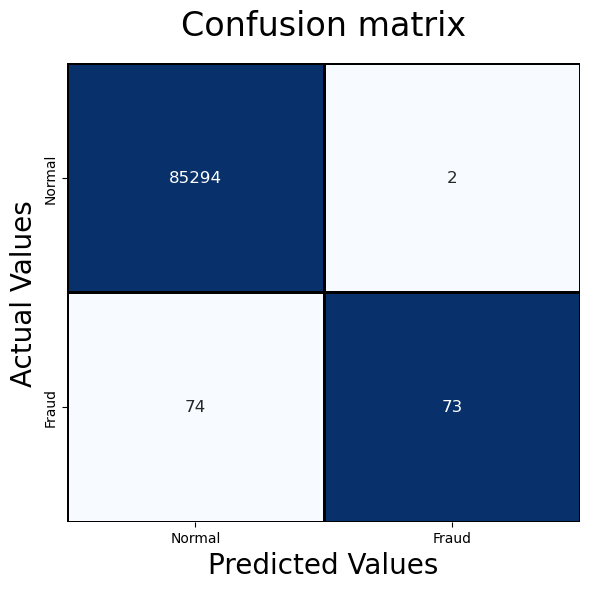

Classified 	73 out of 147 	fraud cases correctly
Misclassified 	2 out of 85296 normal cases
AROC score :- 
 0.748287595848694


In [15]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.9)
LABELS = ['Normal', 'Fraud']
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")